## Notebook A 

En este primer *notebook* analizaremos con 4 indicadores o métricas diferentes, una serie de datos demográficos relativos a los  diferentes municipios que conforman las Islas Baleares para el año 2020.

Fuente del dataset:
https://datos.gob.es/es/catalogo/ea0010587-balears-illes-por-municipios-y-fenomeno-demografico-mnpd-identificador-api-t20-e301-fenom-a2020-l0-23007-px

#### Carga de los datos

In [2]:
import numpy as np

#cargamos el conjunto de datos.
#nos saltamos la primera fila (header) y empleamos la codificación 'utf-8' para poder visualizar correctamente los carácteres especiales.
#cargamos los datos como strings.
datos = np.genfromtxt('data/50376.csv', delimiter=';', skip_header=1, dtype = str, encoding ='utf-8')
#datos es un array de 2 dimensiones.
print(datos)
print(type(datos)) #comprobamos que es un array de numpy.



[['07002 Alaior' 'nacidos vivos por residencia materna' '70']
 ['07002 Alaior' 'muertes fetales tardías por residencia materna' '0']
 ['07002 Alaior' 'matrimonios por el lugar en que han fijado residencia'
  '27']
 ...
 ['07065 Vilafranca de Bonany'
  'matrimonios por el lugar en que han fijado residencia' '7']
 ['07065 Vilafranca de Bonany' 'fallecidos por el lugar de residencia'
  '24']
 ['07065 Vilafranca de Bonany' 'crecimiento vegetativo' '25']]
<class 'numpy.ndarray'>


#### PRIMER INDICADOR

Con este primer indicador, se calculará el crecimiento vegetativo medio de los municipios de Baleares.


In [3]:

#Primeramente filtraremos en la segunda columna el texto "crecimiento vegetativo"

filtro1 = np.asarray(['crecimiento vegetativo'])
#la función "np.in1d" permite comprobar si un elemento de un array está presente en otro.
arrayfiltrado1 = datos[np.in1d(datos[:, 1], filtro1)] #filtramos los datos y guardamos el nuevo array resultante
print(arrayfiltrado1)
print(arrayfiltrado1.shape) #comprobamos la estructura o forma


[['07002 Alaior' 'crecimiento vegetativo' '6']
 ['07001 Alaró' 'crecimiento vegetativo' '8']
 ['07003 Alcúdia' 'crecimiento vegetativo' '70']
 ['07004 Algaida' 'crecimiento vegetativo' '6']
 ['07005 Andratx' 'crecimiento vegetativo' '6']
 ['07901 Ariany' 'crecimiento vegetativo' '-1']
 ['07006 Artà' 'crecimiento vegetativo' '-8']
 ['07007 Banyalbufar' 'crecimiento vegetativo' '1']
 ['07008 Binissalem' 'crecimiento vegetativo' '3']
 ['07009 Búger' 'crecimiento vegetativo' '0']
 ['07010 Bunyola' 'crecimiento vegetativo' '-5']
 ['07011 Calvià' 'crecimiento vegetativo' '46']
 ['07012 Campanet' 'crecimiento vegetativo' '-10']
 ['07013 Campos' 'crecimiento vegetativo' '15']
 ['07014 Capdepera' 'crecimiento vegetativo' '15']
 ['07064 Castell, Es' 'crecimiento vegetativo' '-1']
 ['07015 Ciutadella de Menorca' 'crecimiento vegetativo' '-11']
 ['07016 Consell' 'crecimiento vegetativo' '10']
 ['07017 Costitx' 'crecimiento vegetativo' '6']
 ['07018 Deiá' 'crecimiento vegetativo' '1']
 ['07026 Eivi

In [4]:
#Procedemos a calcular la media de la tercera columna del array, para poder obtener la media del crecimiento vegetativo.

#No obstante, para poder realizar el cálculo, debemos eliminar las dos primeras columnas y pasar el array de numpy a tipo "int".
datosCrecimiento = np.delete(arrayfiltrado1, [0,1], 1) #eliminamos las 2 primeras columnas ya que no serán necesarias.
print(datosCrecimiento)

#pasamos el array anterior a tipo float y calculamos la media.
crecimiento_veg = np.asarray(datosCrecimiento, dtype = float)
media = np.mean(crecimiento_veg, axis=0)[0]

print("La media aritmética del crecimiento vegetativo de los municipios de Baleares es de: " + str(media))


[['6']
 ['8']
 ['70']
 ['6']
 ['6']
 ['-1']
 ['-8']
 ['1']
 ['3']
 ['0']
 ['-5']
 ['46']
 ['-10']
 ['15']
 ['15']
 ['-1']
 ['-11']
 ['10']
 ['6']
 ['1']
 ['119']
 ['3']
 ['-10']
 ['-2']
 ['14']
 ['9']
 ['39']
 ['1']
 ['88']
 ['4']
 ['14']
 ['1']
 ['59']
 ['104']
 ['3']
 ['50']
 ['-11']
 ['64']
 ['4']
 ['3']
 ['-8']
 ['6']
 ['-10']
 ['-2']
 ['62']
 ['-4']
 ['-8']
 ['1']
 ['-8']
 ['79']
 ['-23']
 ['3']
 ['96']
 ['6']
 ['-4']
 ['-3']
 ['74']
 ['-18']
 ['-2']
 ['-42']
 ['5']
 ['-3']
 ['-11']
 ['-37']
 ['13']
 ['-4']
 ['25']]
La media aritmética del crecimiento vegetativo de los municipios de Baleares es de: 13.373134328358208


#### SEGUNDO INDICADOR

En este segundo caso, vamos a ordenar los municipios de Baleares según el número de "nacidos vivos por residencia materna".

In [5]:
#Como en el caso anterior, debemos filtrar la segunda columna para poder trabajar únicamente con los datos correspondientes a los "nacidos vivos por residencia materna".

filtro2 = np.asarray(['nacidos vivos por residencia materna'])
#la función "np.in1d" permite comprobar si un elemento de un array está presente en otro.
arrayfiltrado2 = datos[np.in1d(datos[:, 1], filtro2)] 
#Adicionalmente, debemos eliminar el separador de millares que aparece en los datos "3.345", ya que se interpretaría como un decimal.

arrayfiltrado2 = np.core.defchararray.replace(arrayfiltrado2, '.', '') #cambiamos los posibles puntos separadores de millares por un carácter vacío.
print(arrayfiltrado2.shape) #comprobamos la estructura o forma

#ordenamos de menor a mayor según los valores de la tercera columna.
#se pasa la tercera columna a tipo "int" con el método .astype(int) para poder ordenar correctamente.
indicador2 = arrayfiltrado2[arrayfiltrado2[:, 2].astype(int).argsort()]  # .argsort() permite ordenar el array mediante índices.
#obtenemos ordenados de manera ascendente los municipios de Baleares según el número de nacidos vivo por residencia materna.
print(indicador2)


(67, 3)
[['07021 Estellencs' 'nacidos vivos por residencia materna' '1']
 ['07019 Escorca' 'nacidos vivos por residencia materna' '3']
 ['07007 Banyalbufar' 'nacidos vivos por residencia materna' '3']
 ['07025 Fornalutx' 'nacidos vivos por residencia materna' '4']
 ['07018 Deiá' 'nacidos vivos por residencia materna' '5']
 ['07901 Ariany' 'nacidos vivos por residencia materna' '6']
 ['07902 Migjorn Gran, Es' 'nacidos vivos por residencia materna' '6']
 ['07053 Santa Eugènia' 'nacidos vivos por residencia materna' '8']
 ['07009 Búger' 'nacidos vivos por residencia materna' '10']
 ['07045 Puigpunyent' 'nacidos vivos por residencia materna' '13']
 ['07034 Mancor de la Vall' 'nacidos vivos por residencia materna' '13']
 ['07063 Valldemossa' 'nacidos vivos por residencia materna' '13']
 ['07017 Costitx' 'nacidos vivos por residencia materna' '14']
 ['07028 Lloret de Vistalegre' 'nacidos vivos por residencia materna'
  '16']
 ['07035 Maria de la Salut' 'nacidos vivos por residencia materna' 

#### TERCER INDICADOR

En este tercer apartado, vamos a ver cómo se distribuyen los datos relativos al número de "muertes fetales tardías por residencia materna".

Para ello, vamos a generar un histograma.


(67, 3)
[ 0  0  2  1  1  0  0  0  1  0  0  4  0  0  1  0  0  0  0  0  1  0  0  0
  1  0  1  0  0  0  0  0  3  0  0  1  0  2  0  0  1  0 16  0  1  0  0  0
  0  2  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


Text(0.5, 0, 'Muertes fetales tardías')

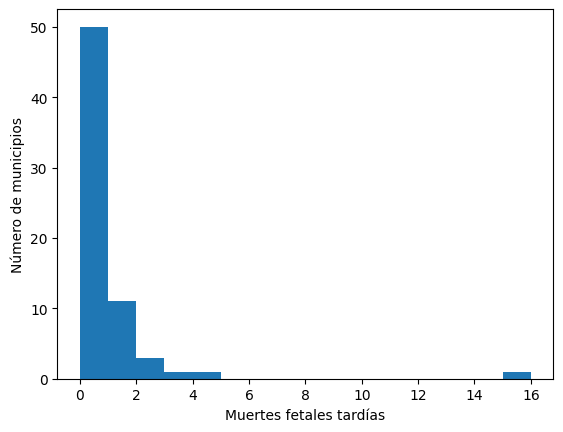

In [6]:
#importamos la librería matplotlib para poder realizar gráficos
import matplotlib.pyplot as plt

#filtraremos la segunda columna con el string "muertes fetales tardías por residencia materna"
filtro3 = np.asarray(['muertes fetales tardías por residencia materna'])
#la función "np.in1d" permite comprobar si un elemento de un array está presente en otro.
arrayfiltrado3 = datos[np.in1d(datos[:, 1], filtro3)] 

print(arrayfiltrado3.shape) #comprobamos la estructura o forma
arrayfiltrado3 = np.core.defchararray.replace(arrayfiltrado3, '.', '') #cambiamos los posibles separadores de millares (".") por un carácter vacío.

#Debemos eliminar las dos primeras columnas y pasar el array de numpy a tipo "int".
datosCrecimiento = np.delete(arrayfiltrado3, [0,1], 1) #eliminamos las 2 primeras columnas ya que no serán necesarias
indicador3 = np.asarray(datosCrecimiento, dtype = int)
#pasamos el array de 2D a 1D.
indicador3 = indicador3.ravel()
print(indicador3)

plt.hist(indicador3.flat, bins=16)
#añadimos etiquetas
plt.ylabel('Número de municipios')
plt.xlabel('Muertes fetales tardías')

Los datos se concentran principalmente en la parte izquierda del gráfico ya que la mayoría de municipios son de pequeño tamaño y no presentan prácticamente casos de muertes fetales tardías. A la derecha de la distribución tenemos a Palma con 16 casos, presentando muchos más casos que los demás municipios. Este último resultado es razonable, ya que Palma es la ciudad más poblada del archipiélago Balear con mucha diferencia respecto a las demás.

#### CUARTO INDICADOR

En este cuarto y último apartado relativo a este *notebook*, vamos calcular la mediana del número de "matrimonios por el lugar en que han fijado residencia".


In [7]:
#Filtramos la segunda columna con el texto "matrimonios por el lugar en que han fijado residencia"
filtro4 = np.asarray(['matrimonios por el lugar en que han fijado residencia'])
arrayfiltrado4 = datos[np.in1d(datos[:, 1], filtro4)] 

print(arrayfiltrado4.shape) #comprobamos la estructura o forma
arrayfiltrado4 = np.core.defchararray.replace(arrayfiltrado4, '.', '') #cambiamos los posibles separadores de millares (".") por un carácter vacío.

datosMatrimonio = np.delete(arrayfiltrado4, [0,1], 1) #eliminamos las 2 primeras columnas ya que no las necesitaremos para el cálculo.
print(datosMatrimonio)

resultado4 = np.asarray(datosMatrimonio, dtype = int)
median = np.median(resultado4, axis=0)[0]

print("La mediana del número de matrimonios por municipios en Baleares es de: " + str(median))


(67, 3)
[['27']
 ['16']
 ['43']
 ['18']
 ['40']
 ['2']
 ['12']
 ['3']
 ['26']
 ['4']
 ['15']
 ['112']
 ['9']
 ['37']
 ['29']
 ['14']
 ['92']
 ['17']
 ['11']
 ['1']
 ['98']
 ['0']
 ['14']
 ['0']
 ['42']
 ['13']
 ['28']
 ['1']
 ['71']
 ['2']
 ['17']
 ['10']
 ['98']
 ['81']
 ['8']
 ['88']
 ['9']
 ['95']
 ['14']
 ['8']
 ['7']
 ['23']
 ['1114']
 ['7']
 ['27']
 ['50']
 ['10']
 ['3']
 ['7']
 ['62']
 ['4']
 ['9']
 ['64']
 ['25']
 ['20']
 ['5']
 ['113']
 ['35']
 ['20']
 ['23']
 ['14']
 ['11']
 ['6']
 ['33']
 ['32']
 ['4']
 ['7']]
La mediana del número de matrimonios por municipios en Baleares es de: 16.0
